---
title: "Miscarriage Prediction – Risk Factors"
author: "Aicha Saidane"
format:
  revealjs:
    theme: simple
    slide-number: true
    transition: slide
    code-fold: false
    width: 1100
    height: 700
    margin: 0.05

execute:
  echo: true
  warning: false
  message: false
---


# A. Contexte du projet
Ce projet s’appuie sur le dataset “HIBA ASRI – Miscarriage Prediction Risk Factors”, publié le 25 mai 2021 sur la plateforme Mendeley Data, et contribué par Hiba Asri.
Ce jeu de données regroupe des informations médicales et comportementales collectées auprès de femmes enceintes, dans le but d’étudier les facteurs de risque associés aux fausses couches (miscarriages).
Les données ont été obtenues à partir de plusieurs sources, notamment :
•	Capteurs de santé (IoT) permettant de mesurer des paramètres physiologiques tels que :
o	la fréquence cardiaque (Heart Rate),
o	le niveau de stress,
o	la température corporelle,
o	la tension artérielle.
•	Téléphones mobiles, utilisés pour collecter des informations liées au mode de vie et au contexte des patientes, comme :
o	l’activité physique (marche, vélo, conduite, position assise),
o	l’indice de masse corporelle (IMC),
o	la localisation,
o	les antécédents médicaux.
________________________________________
##Objectif du projet
L’objectif principal de ce projet est de prétraiter, nettoyer et analyser les données de manière approfondie, afin de mieux comprendre les relations entre les variables physiologiques, comportementales et les cas de fausse couche.


# B. Import des Librairies
"Dans cette étape, nous chargeons les librairies essentielles pour manipuler, résumer et visualiser nos données. Elles nous permettent de faire des analyses statistiques rapides et de visualiser facilement les relations entre les variables."

In [ ]:
# Installer les packages (à faire une seule fois si pas déjà installés)
install.packages("tidyverse")
install.packages("skimr")
install.packages("psych")
install.packages("GGally")

# Charger les packages
library(tidyverse)  # dplyr, ggplot2, readr, etc.
library(skimr)      # résumé rapide du dataset
library(psych)      # stats descriptives
library(GGally)     # ggpairs pour relations entre variables

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# C. Chargement du Dataset


In [ ]:
# Lire le fichier CSV avec le bon séparateur
data_raw <- read.csv("/content/sample_data/Miscarriage_Prediction_dataset_New_HA.csv",
                     sep = ";",
                     header = TRUE,
                     stringsAsFactors = FALSE)



# D. Exploration Initiale


"Nous commençons par explorer le dataset : afficher les premières lignes pour avoir un aperçu, vérifier ses dimensions et lister les noms des variables. Cela nous permet de comprendre la structure générale des données avant de les analyser en détail."

In [ ]:
# Aperçu des 6 premières lignes
head(data_raw)

# Dimensions du dataset (lignes, colonnes)
dim(data_raw)

# Nom des variables
names(data_raw)

,Age,BMI,Nmisc,Activity,Binking,Walking,Drinving,Sitting,Location,temp,bpm,stress,bp,Alcohol.Comsumption,Drunk,Miscarriage..No.Miscarriage
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,22,"16,68823896",0,1,0,0,1,1,2,38,103,0,2,449,0,0
2,22,"16,68823896",0,1,0,0,1,1,1,36,103,0,2,276,2,0
3,22,"16,68823896",2,1,0,0,1,1,3,38,103,0,2,534,2,0
4,22,"16,68823896",0,1,0,1,0,1,2,39,102,1,2,230,2,0
5,22,"16,68823896",1,1,0,1,0,1,3,35,102,1,2,364,2,0
6,22,"16,68823896",0,1,1,0,0,0,0,35,102,1,2,211,2,0


[1] 1000000      16

[1] "Age"                         "BMI"                        
 [3] "Nmisc"                       "Activity"                   
 [5] "Binking"                     "Walking"                    
 [7] "Drinving"                    "Sitting"                    
 [9] "Location"                    "temp"                       
[11] "bpm"                         "stress"                     
[13] "bp"                          "Alcohol.Comsumption"        
[15] "Drunk"                       "Miscarriage..No.Miscarriage"

Tableau de dictionnaire des variables :

Age : âge de la patiente (années), numérique.
BMI : indice de masse corporelle, numérique.
 bpm : fréquence cardiaque, numérique.
stress : niveau de stress (catégoriel).
Activity, Biking, Walking, Driving, Sitting, Location : activité / contexte, catégorielles.
etc.

# E. Prétraitement des Types & Nettoyage


Dans une première phase de prétraitement, les types de variables ont été corrigés. La variable BMI, initialement stockée sous forme textuelle avec une virgule comme séparateur décimal, a été convertie en variable numérique. Les variables représentant des états ou catégories (activité, stress, localisation, issue de la grossesse) ont été transformées en facteurs afin de garantir une analyse statistique et graphique correcte.
 Ensuite, nous vérifions la structure du dataset pour confirmer que toutes les variables sont correctement typées."

In [ ]:
# Copier le dataset brut vers un dataset de travail
data <- data_raw

# 1) Transformer BMI en numérique (remplacer la virgule par un point)
data$BMI <- gsub(",", ".", data$BMI)      # remplace , par .
data$BMI <- as.numeric(data$BMI)         # conversion en numérique

# 2) Convertir certaines colonnes en factor (catégorielles)
cols_factor <- c("Activity",
                 "Binking",
                 "Walking",
                 "Drinving",
                 "Sitting",
                 "Location",
                 "stress",
                 "Miscarriage..No.Miscarriage")  # R remplace souvent "/" et espaces dans les noms

# Vérifier les vrais noms des colonnes pour adapter si besoin
names(data)

# Conversion en factor pour les colonnes qui existent vraiment
for (col in cols_factor) {
  if (col %in% names(data)) {
    data[[col]] <- as.factor(data[[col]])
  }
}

# Vérifier les structures
str(data)

[1] "Age"                         "BMI"                        
 [3] "Nmisc"                       "Activity"                   
 [5] "Binking"                     "Walking"                    
 [7] "Drinving"                    "Sitting"                    
 [9] "Location"                    "temp"                       
[11] "bpm"                         "stress"                     
[13] "bp"                          "Alcohol.Comsumption"        
[15] "Drunk"                       "Miscarriage..No.Miscarriage"

'data.frame':	1000000 obs. of  16 variables:
 $ Age                        : int  22 22 22 22 22 22 22 22 22 22 ...
 $ BMI                        : num  16.7 16.7 16.7 16.7 16.7 ...
 $ Nmisc                      : int  0 0 2 0 1 0 1 2 2 1 ...
 $ Activity                   : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Binking                    : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 2 1 ...
 $ Walking                    : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 1 2 1 2 ...
 $ Drinving                   : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ Sitting                    : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 1 2 2 2 ...
 $ Location                   : Factor w/ 5 levels "0","1","2","3",..: 3 2 4 3 4 1 5 3 4 3 ...
 $ temp                       : int  38 36 38 39 35 35 38 39 36 38 ...
 $ bpm                        : int  103 103 103 102 102 102 209 209 209 209 ...
 $ stress                     : Factor w/ 4 levels "0","1","2","3": 1 1 1 2 2 2 3 3 3 3 ...
 $ 

"Nous réalisons un résumé statistique descriptif des variables. Cela nous permet d’observer les mesures centrales comme la moyenne et la médiane, la dispersion via les minimum et maximum, et la distribution des variables catégorielles. Par exemple, l’âge des patientes varie de 22 à 26 ans, le BMI de 16,7 à 26,5, et on note que 213 869 observations correspondent à des grossesses sans fausse couche et 153 496 à des fausses couches. Ces informations sont essentielles pour comprendre les tendances générales du dataset avant d’aller plus loin dans l’analyse."

In [ ]:

summary(data)

      Age          BMI            Nmisc       Activity    Binking    Walking   
 Min.   :22   Min.   :16.69   Min.   :0.000   1:1000000   0:500686   0:501720  
 1st Qu.:25   1st Qu.:18.83   1st Qu.:1.000               1:499314   1:498280  
 Median :28   Median :21.40   Median :2.000                                    
 Mean   :28   Mean   :21.61   Mean   :1.501                                    
 3rd Qu.:31   3rd Qu.:24.39   3rd Qu.:3.000                                    
 Max.   :34   Max.   :26.53   Max.   :3.000                                    
 Drinving   Sitting    Location        temp            bpm        stress    
 0:997594   0:499581   0:199395   Min.   :35.00   Min.   : 43.0   0:342140  
 1:  2406   1:500419   1:199818   1st Qu.:36.00   1st Qu.: 78.0   1:346710  
                       2:200552   Median :38.00   Median :119.0   2: 81280  
                       3:200154   Mean   :37.78   Mean   :128.9   3:229870  
                       4:200081   3rd Qu.:39.00   3rd Q

"Nous renommons certaines variables pour simplifier leur lecture et éviter les caractères spéciaux. Par exemple, Alcohol.Comsumption devient Alcohol_Consumption et Miscarriage..No.Miscarriage devient Miscarriage. Cela facilite l’analyse et la visualisation des données."

In [ ]:
# Renommer quelques variables pour enlever les points multiples
data <- data %>%
  rename(
    Alcohol_Consumption = Alcohol.Comsumption,
    Miscarriage = Miscarriage..No.Miscarriage
  )

"Nous convertissons la variable Drunk en catégorielle (factor) et vérifions les niveaux de toutes les variables catégorielles. Cela permet de s’assurer que chaque variable reflète correctement ses catégories et facilite l’analyse statistique et les visualisations ultérieures."



In [ ]:
# Drunk en factor
data$Drunk <- factor(data$Drunk)

# Vérifier les niveaux
levels(data$Drunk)
levels(data$Activity)
levels(data$Binking)
levels(data$Walking)
levels(data$Drinving)
levels(data$Sitting)
levels(data$Location)
levels(data$stress)
levels(data$Miscarriage)

[1] "0" "1" "2"

[1] "1"

[1] "0" "1"

[1] "0" "1"

[1] "0" "1"

[1] "0" "1"

[1] "0" "1" "2" "3" "4"

[1] "0" "1" "2" "3"

[1] "0" "1"

In [ ]:
names(data)

[1] "Age"                 "BMI"                 "Nmisc"              
 [4] "Activity"            "Binking"             "Walking"            
 [7] "Drinving"            "Sitting"             "Location"           
[10] "temp"                "bpm"                 "stress"             
[13] "bp"                  "Alcohol_Consumption" "Drunk"              
[16] "Miscarriage"

"Nous transformons les variables binaires en facteurs avec des étiquettes explicites. Par exemple, pour Binking, 0 devient No et 1 devient Yes. De même, la variable Miscarriage est renommée avec des labels compréhensibles : 0 devient No_Miscarriage et 1 devient Miscarriage. Cela rend les résultats et les visualisations plus lisibles et interprétables."

In [ ]:
# Exemple pour Binking (0 = ne pas faire du vélo, 1 = en vélo)
data$Binking <- factor(
  data$Binking,
  levels = c("0", "1"),
  labels = c("No", "Yes")
)

data$Walking <- factor(
  data$Walking,
  levels = c("0", "1"),
  labels = c("No", "Yes")
)

data$Drinving <- factor(
  data$Drinving,
  levels = c("0", "1"),
  labels = c("No", "Yes")
)

data$Sitting <- factor(
  data$Sitting,
  levels = c("0", "1"),
  labels = c("No", "Yes")
)

data$Miscarriage <- factor(
  data$Miscarriage,
  levels = c("0", "1"),
  labels = c("No_Miscarriage", "Miscarriage")
)

"La variable Activity présente un cas particulier : elle n’a qu’un seul niveau pour toutes les observations. Nous la conservons pour documentation, mais elle n’apportera pas d’information discriminante dans l’analyse."

In [ ]:
table(data$Activity)


      1 
1000000 

# F. Gestion des Duplicatas & NA

But : est-ce qu’il y a des valeurs manquantes ? des doublons ?

"Nous vérifions la présence de valeurs manquantes (NA) et de doublons dans le dataset. Aucune valeur manquante n’a été détectée, et seulement 74 lignes sont des duplicatas sur 367 365 observations. Cela confirme que les données sont globalement complètes et fiables pour l’analyse."

In [ ]:
# Nombre de valeurs manquantes par variable
colSums(is.na(data))

# Proportion de NA par variable
colMeans(is.na(data))

# Nombre de lignes dupliquées
sum(duplicated(data))

Age                 BMI               Nmisc            Activity 
                  0                   0                   0                   0 
            Binking             Walking            Drinving             Sitting 
                  0                   0                   0                   0 
           Location                temp                 bpm              stress 
                  0                   0                   0                   0 
                 bp Alcohol_Consumption               Drunk         Miscarriage 
                  0                   0                   0                   0

Age                 BMI               Nmisc            Activity 
                  0                   0                   0                   0 
            Binking             Walking            Drinving             Sitting 
                  0                   0                   0                   0 
           Location                temp                 bpm              stress 
                  0                   0                   0                   0 
                 bp Alcohol_Consumption               Drunk         Miscarriage 
                  0                   0                   0                   0

[1] 74

In [ ]:
sum(duplicated(data))

[1] 74

"Nous supprimons les lignes dupliquées afin de garantir l’unicité des observations. Après cette opération, aucun doublon n’est présent et le dataset contient désormais 999 926 lignes, prêt pour l’analyse exploratoire."

In [ ]:

# Suppression des doublons
data <- data[!duplicated(data), ]

# Vérification après suppression
sum(duplicated(data))
nrow(data)  # nombre de lignes après nettoyage

[1] 0

[1] 999926

#G. Analyse Exploratoire Globale

*"Nous réalisons une analyse exploratoire globale du dataset. La structure des données montre que nous avons 999 926 observations et 16 variables de types numériques et catégoriels.

Les statistiques descriptives révèlent :

l’âge des patientes varie de 22 à 34 ans avec une moyenne de 28 ans,

le BMI va de 16,7 à 26,5 avec une moyenne de 21,6,

les variables binaires comme Binking, Walking, Drinving et Sitting sont presque équilibrées entre leurs deux niveaux,

la variable cible Miscarriage est également équilibrée avec 500 530 grossesses sans fausse couche et 499 396 avec fausse couche.

Cette étape permet de comprendre la distribution générale des variables avant de procéder à des analyses plus détaillées et des visualisations."*

In [ ]:
#Structure & types
str(data)
#Statistiques descriptives
summary(data)

'data.frame':	999926 obs. of  16 variables:
 $ Age                : int  22 22 22 22 22 22 22 22 22 22 ...
 $ BMI                : num  16.7 16.7 16.7 16.7 16.7 ...
 $ Nmisc              : int  0 0 2 0 1 0 1 2 2 1 ...
 $ Activity           : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Binking            : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 2 2 1 2 1 ...
 $ Walking            : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 2 1 2 ...
 $ Drinving           : Factor w/ 2 levels "No","Yes": 2 2 2 1 1 1 1 1 1 1 ...
 $ Sitting            : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 1 2 2 2 ...
 $ Location           : Factor w/ 5 levels "0","1","2","3",..: 3 2 4 3 4 1 5 3 4 3 ...
 $ temp               : int  38 36 38 39 35 35 38 39 36 38 ...
 $ bpm                : int  103 103 103 102 102 102 209 209 209 209 ...
 $ stress             : Factor w/ 4 levels "0","1","2","3": 1 1 1 2 2 2 3 3 3 3 ...
 $ bp                 : int  2 2 2 2 2 2 3 3 3 3 ...
 $ Alcohol_Consumption: int  449 27

      Age          BMI            Nmisc       Activity   Binking     
 Min.   :22   Min.   :16.69   Min.   :0.000   1:999926   No :500649  
 1st Qu.:25   1st Qu.:18.83   1st Qu.:1.000              Yes:499277  
 Median :28   Median :21.40   Median :2.000                          
 Mean   :28   Mean   :21.61   Mean   :1.501                          
 3rd Qu.:31   3rd Qu.:24.39   3rd Qu.:3.000                          
 Max.   :34   Max.   :26.53   Max.   :3.000                          
 Walking      Drinving     Sitting      Location        temp      
 No :501683   No :997520   No :499547   0:199380   Min.   :35.00  
 Yes:498243   Yes:  2406   Yes:500379   1:199808   1st Qu.:36.00  
                                        2:200534   Median :38.00  
                                        3:200138   Mean   :37.78  
                                        4:200066   3rd Qu.:39.00  
                                                   Max.   :41.00  
      bpm        stress           bp     

# H. EDA Univariée - Variables Numériques

"Nous réalisons une analyse univariée des variables numériques en utilisant des histogrammes. Cela permet de visualiser la distribution des variables comme Age, BMI, bpm et temp. Ces graphiques montrent la fréquence des observations dans chaque intervalle et aident à identifier les tendances générales, les valeurs extrêmes ou les anomalies."

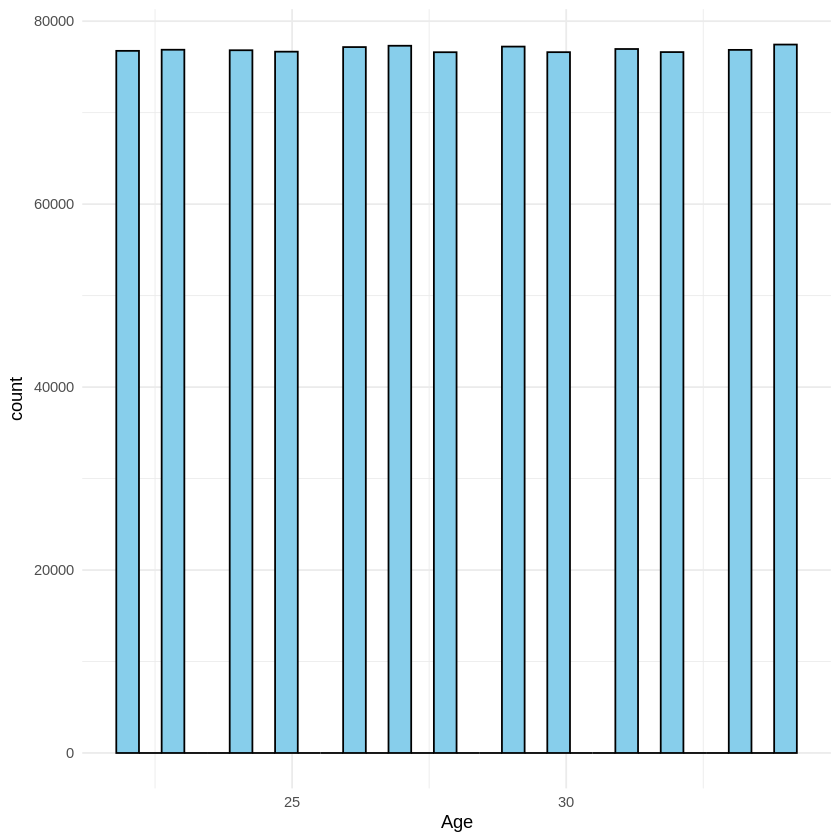

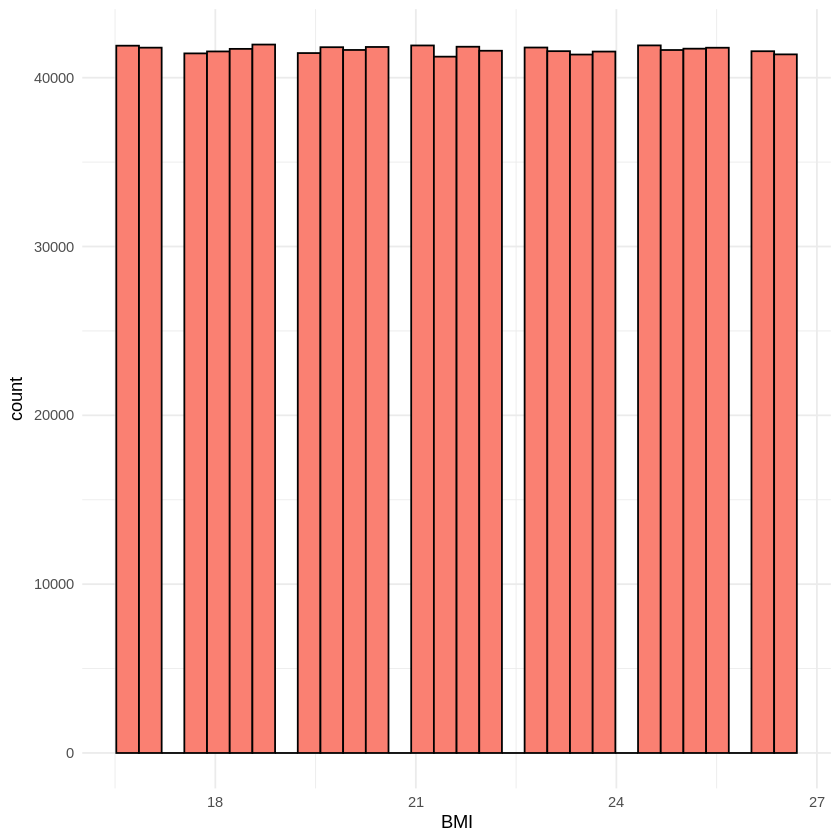

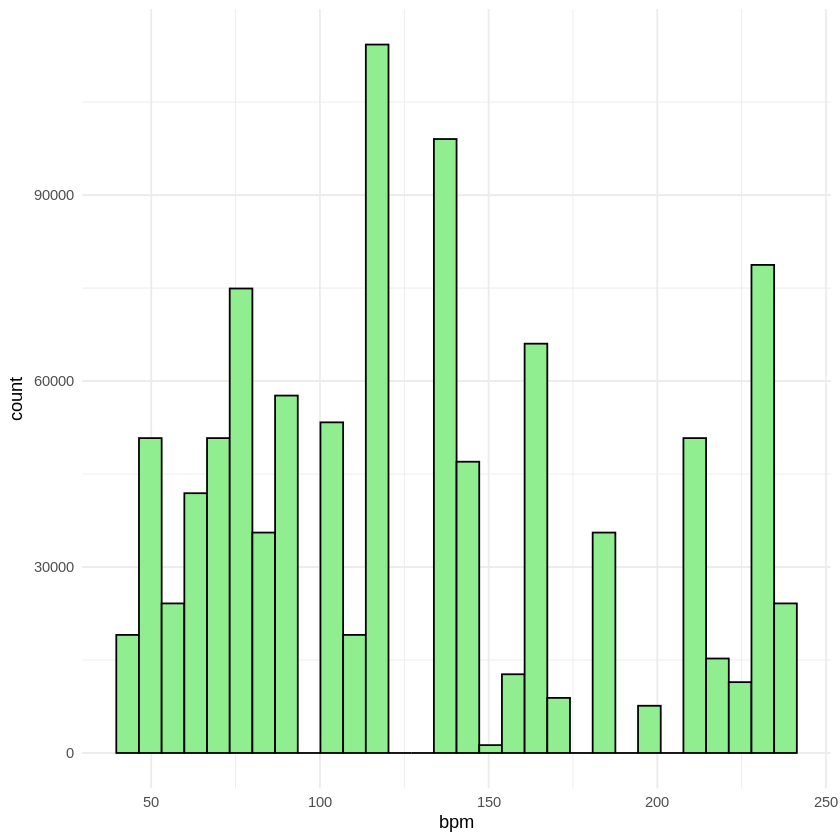

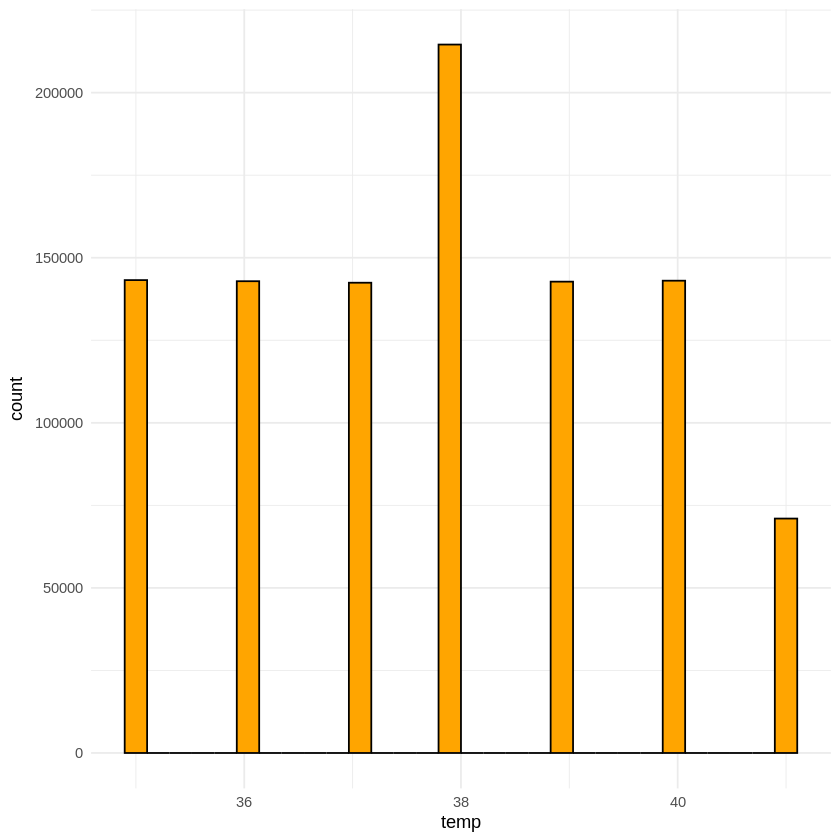

In [ ]:
library(ggplot2)

ggplot(data, aes(x = Age)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  theme_minimal()

ggplot(data, aes(x = BMI)) +
  geom_histogram(bins = 30, fill = "salmon", color = "black") +
  theme_minimal()

ggplot(data, aes(x = bpm)) +
  geom_histogram(bins = 30, fill = "lightgreen", color = "black") +
  theme_minimal()

ggplot(data, aes(x = temp)) +
  geom_histogram(bins = 30, fill = "orange", color = "black") +
  theme_minimal()

Analyse descriptive comparative entre les groupes (Miscarriage vs No_Miscarriage):
"Nous réalisons une analyse descriptive comparative entre les deux groupes : Miscarriage et No_Miscarriage, pour les variables numériques Age, BMI, bpm et temp. Nous calculons la moyenne, l’écart-type et la médiane pour chaque groupe."

Résultats :

Age : les patientes avec fausse couche ont une moyenne légèrement plus élevée (28,93 ans) que celles sans fausse couche (27,08 ans), ce qui pourrait suggérer un effet de l’âge sur le risque.

BMI : les moyennes sont très proches, environ 21,6, indiquant peu de différence entre les deux groupes.

bpm (battements par minute) : similaire entre les groupes, avec une moyenne autour de 128,9 bpm, suggérant peu de variation liée au risque de fausse couche.

temp (température) : pratiquement identique entre les groupes, avec une moyenne d’environ 37,78°C, indiquant que la température corporelle n’est pas discriminante ici.

"Cette analyse permet de comparer les tendances centrales des variables quantitatives entre les groupes et de repérer rapidement celles qui pourraient être liées au risque de fausse couche."

In [ ]:
# Moyennes / médianes par groupe pour les variables quantitatives
aggregate(cbind(Age, BMI, bpm, temp) ~ Miscarriage, data = data,
          FUN = function(x) c(mean = mean(x), sd = sd(x), median = median(x)))

Miscarriage,Age,BMI,bpm,temp
<fct>,"<dbl[,3]>","<dbl[,3]>","<dbl[,3]>","<dbl[,3]>"
No_Miscarriage,"27.07925, 3.789439, 27","21.60042, 2.964625, 21.39518","128.9279, 57.69639, 119","37.78590, 1.819446, 38"
Miscarriage,"28.92870, 3.454456, 29","21.61242, 2.959030, 21.82308","128.8895, 57.73553, 119","37.78199, 1.819556, 38"



*"Nous passons maintenant à des histogrammes comparatifs par groupe, en visualisant la distribution des variables numériques Age, BMI, bpm et temp selon le statut Miscarriage ou No_Miscarriage.

L’utilisation de couleurs différentes et d’une transparence (alpha) permet de superposer les distributions et d’identifier visuellement les différences entre les deux groupes. Par exemple, on remarque que les patientes avec fausse couche ont tendance à être légèrement plus âgées, tandis que pour le BMI, bpm et la température, les distributions sont très similaires entre les groupes."*

Les patientes sans fausse couche (No_Miscarriage) sont principalement concentrées entre 24 et 27 ans.

Les patientes avec fausse couche (Miscarriage) montrent une légère tendance vers des âges plus élevés, surtout autour de 28 à 32 ans.

Les distributions se superposent partiellement, indiquant que l’âge pourrait avoir une influence modeste sur le risque de fausse couche, mais il existe un chevauchement important entre les groupes."*

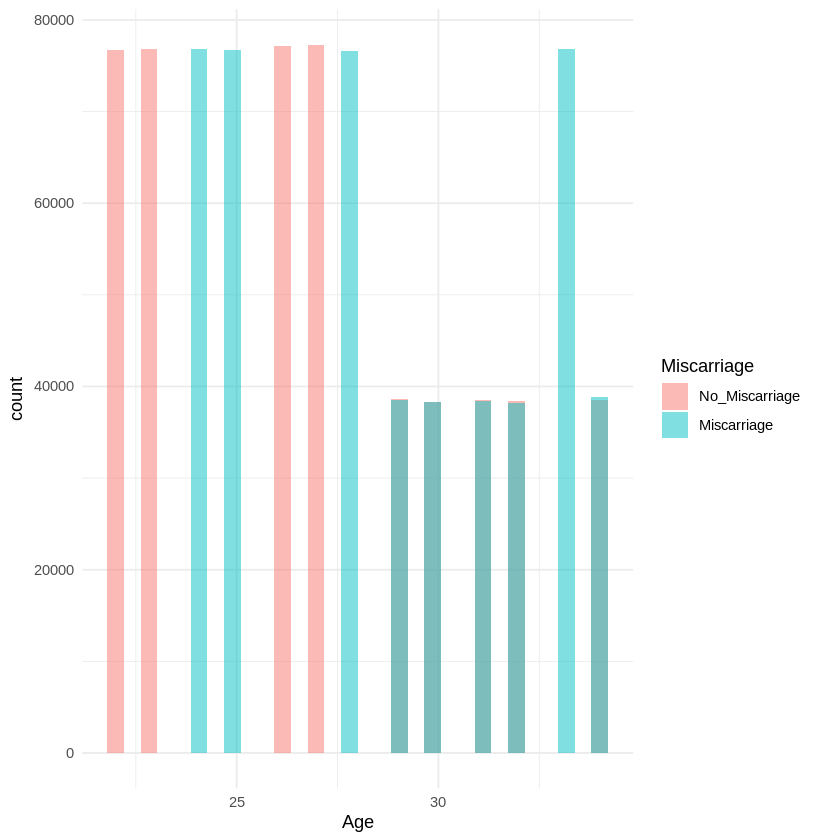

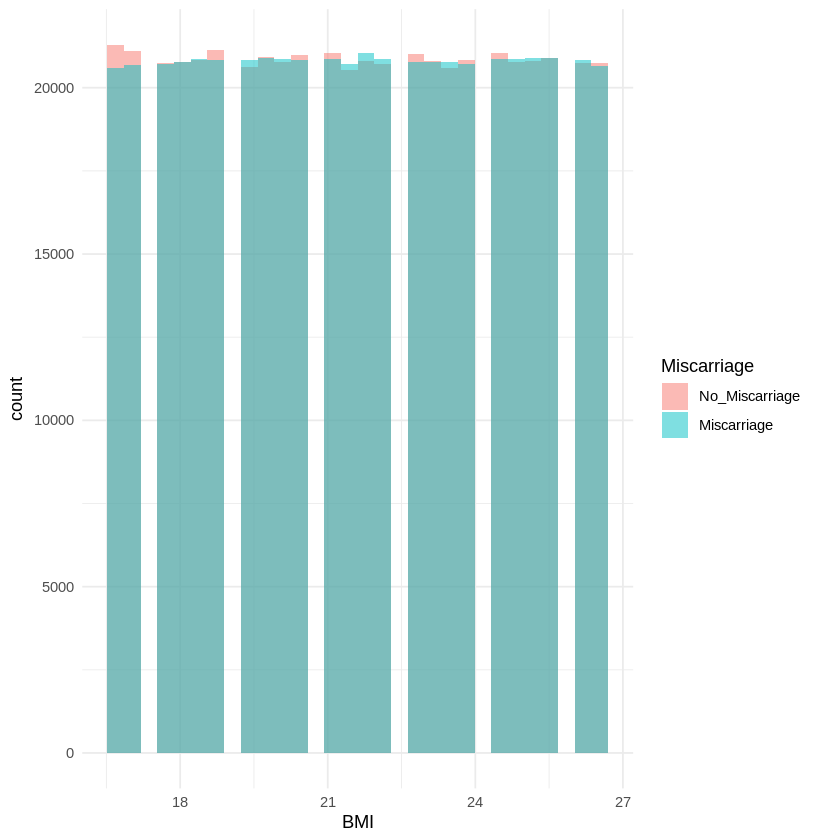

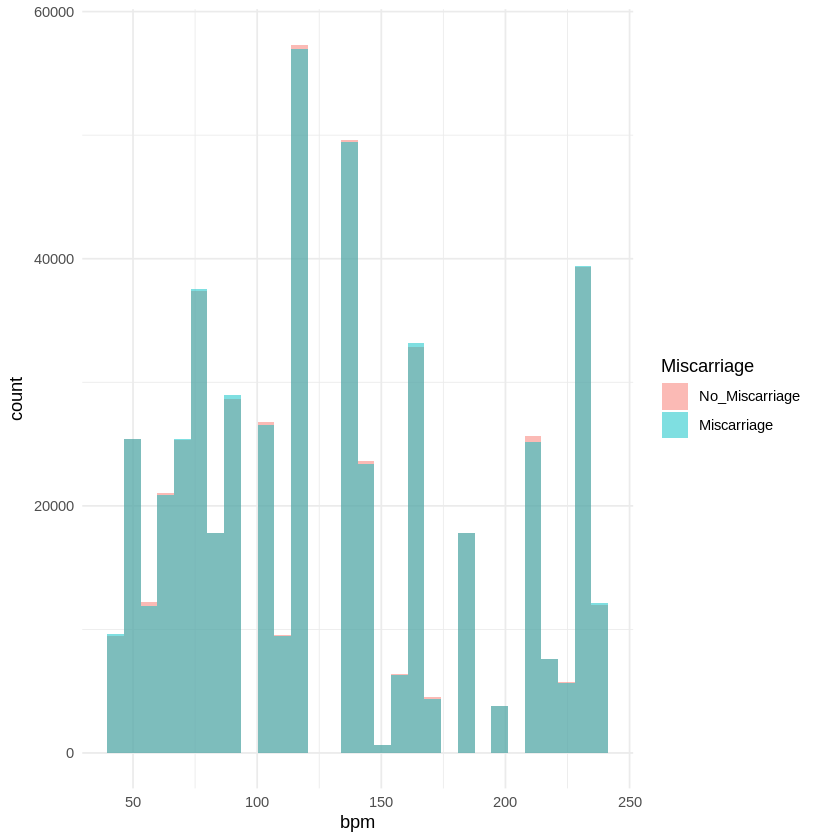

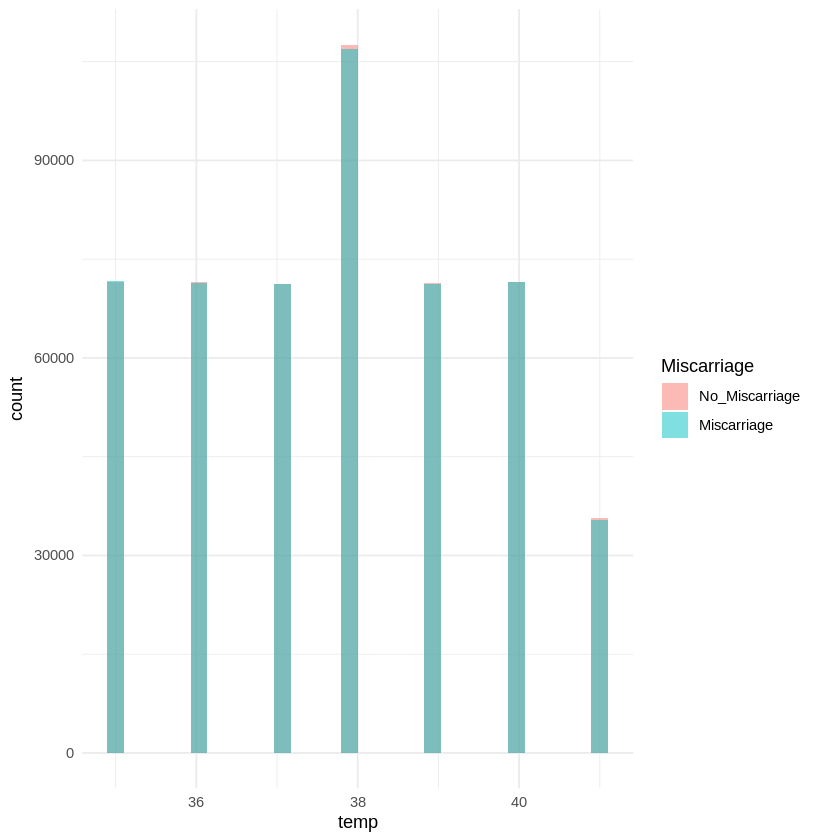

In [ ]:
library(ggplot2)

ggplot(data, aes(x = Age, fill = Miscarriage)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  theme_minimal()

ggplot(data, aes(x = BMI, fill = Miscarriage)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  theme_minimal()

ggplot(data, aes(x = bpm, fill = Miscarriage)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  theme_minimal()

ggplot(data, aes(x = temp, fill = Miscarriage)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  theme_minimal()

Boxplots variable par variable ⁉*"Nous réalisons maintenant des boxplots pour comparer la distribution des variables numériques (Age, BMI, bpm et temp) entre les groupes Miscarriage et No_Miscarriage.

Ces graphiques permettent de visualiser la médiane, les quartiles et les valeurs extrêmes pour chaque groupe.
Par exemple, le boxplot pour l’âge montre que les patientes avec fausse couche ont tendance à être légèrement plus âgées, tandis que pour BMI, bpm et température, les distributions sont très similaires entre les groupes, ce qui confirme les observations faites avec les histogrammes."*

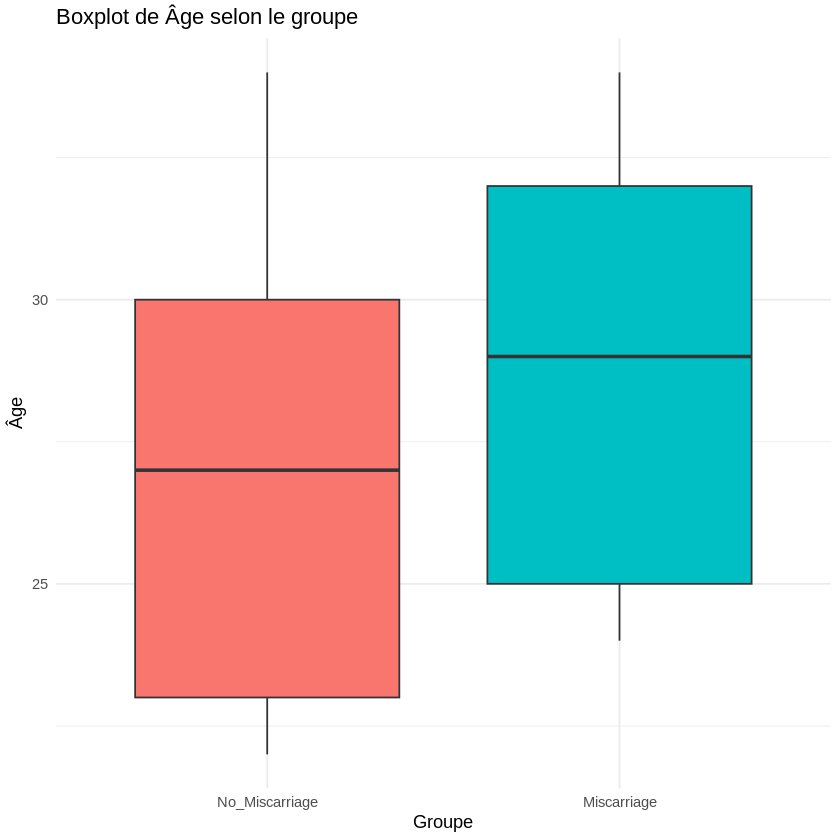

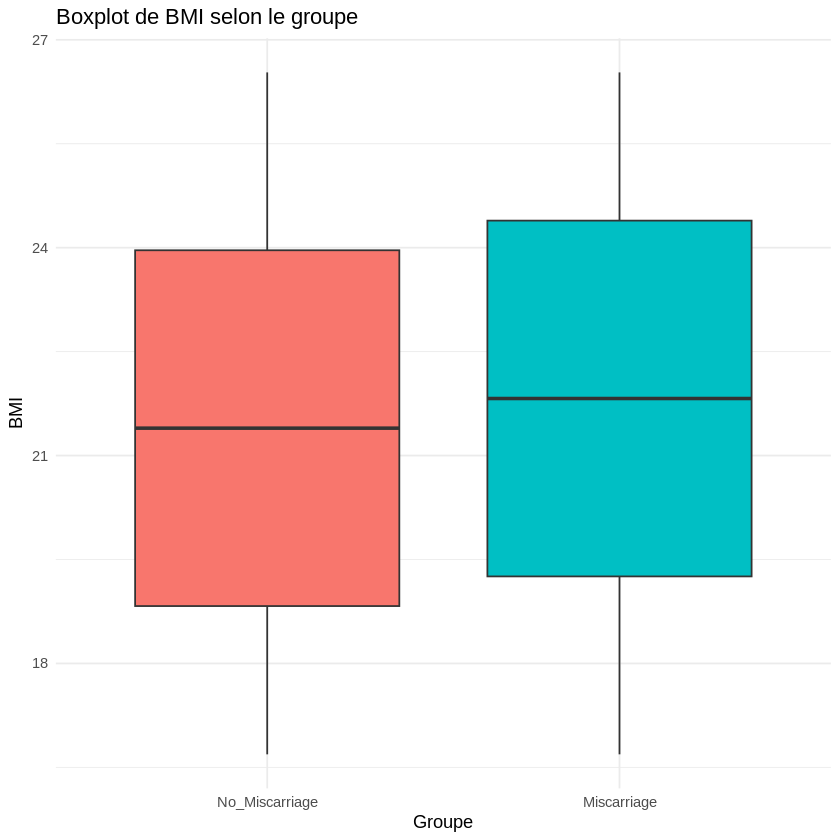

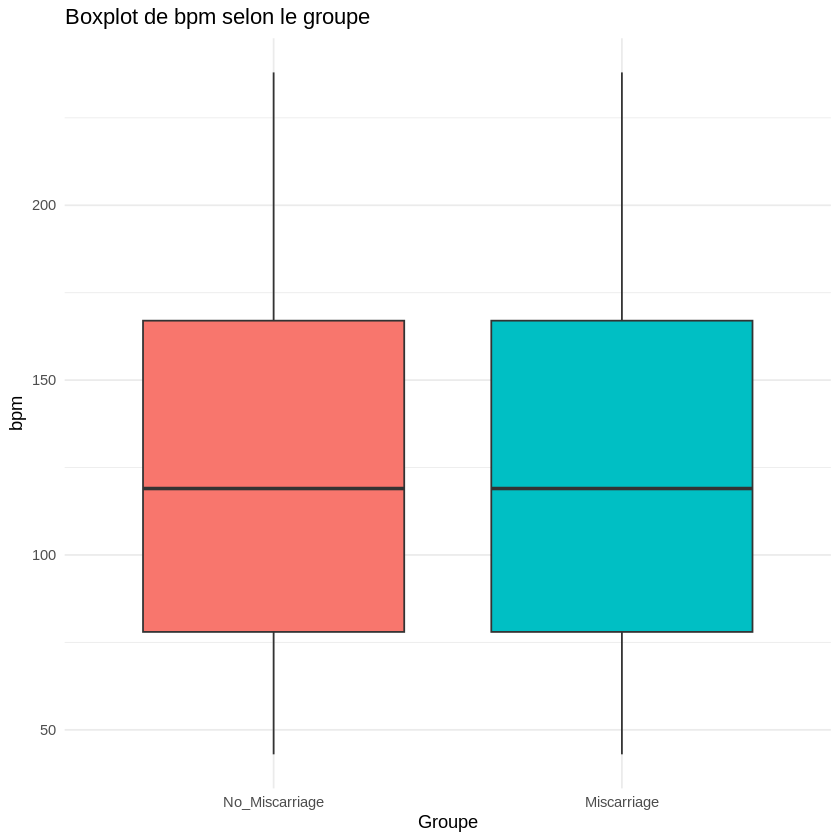

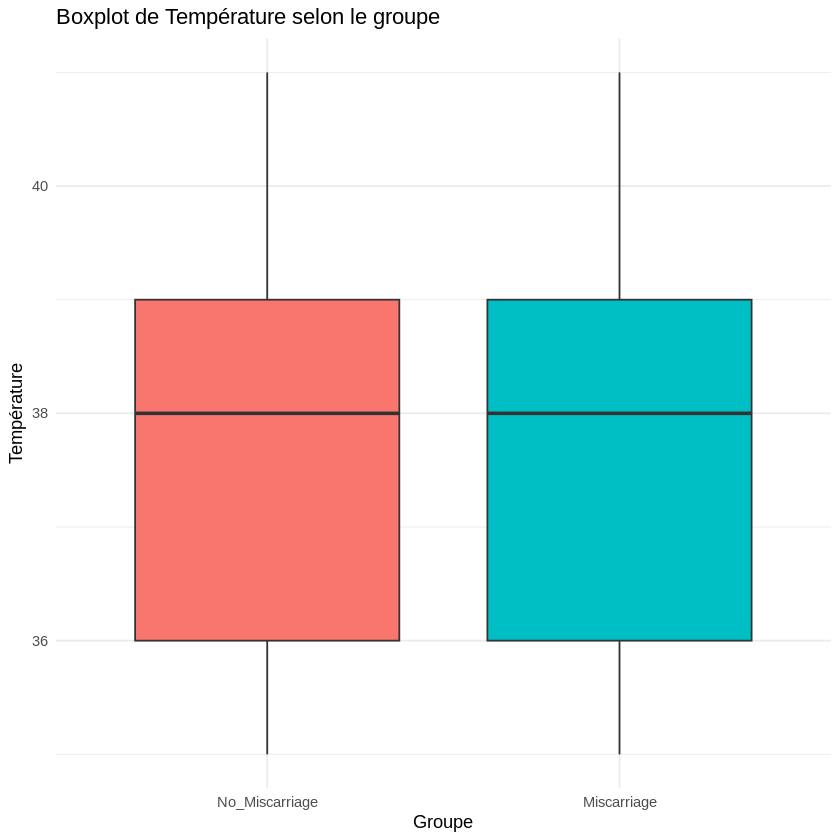

In [ ]:
library(ggplot2)

# Fonction pratique pour éviter de répéter le code
plot_box <- function(var_name, y_label) {
  ggplot(data, aes(x = Miscarriage, y = .data[[var_name]], fill = Miscarriage)) +
    geom_boxplot() +
    labs(
      title = paste("Boxplot de", y_label, "selon le groupe"),
      x = "Groupe",
      y = y_label
    ) +
    theme_minimal() +
    theme(legend.position = "none")
}

plot_box("Age",  "Âge")
plot_box("BMI",  "BMI")
plot_box("bpm",  "bpm")
plot_box("temp", "Température")

statistique + histogramme + densité + boxplot:
Analyse descriptive des variables Age, BMI et bpm

1.Résumé statistique

Age : moyenne ≈ 28 ans, écart-type ≈ 3,7, médiane = 28 → distribution centrée autour de la moyenne.

BMI (Indice de Masse Corporelle) : moyenne ≈ 21,6, médiane ≈ 21,4, écart-type ≈ 2,96 → distribution légèrement asymétrique (skew ≈ 0,44).

bpm (battements par minute) : moyenne ≈ 128,9, écart-type ≈ 57,7, médiane ≈ 119 → forte variabilité et distribution possiblement asymétrique.

2.Visualisation

Histogramme + densité pour le BMI :
Montre que la majorité des individus sont autour de 21-22 avec une forme légèrement asymétrique.

Boxplot pour le BMI :
Permet d’identifier facilement les valeurs extrêmes et la dispersion des données.

3.Observations

Le BMI est relativement stable avec quelques valeurs extrêmes visibles sur le boxplot.

La variable bpm présente une grande variabilité, indiquant des différences importantes entre individus.

Les distributions peuvent présenter de légères asymétries (skewness) et kurtosis différentes, ce qui peut influencer certaines analyses statistiques.

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,1,999926,28.00293,3.742064,28.00000,28.00280,4.447800,22.00000,34.00000,12.000000,0.0002753510,-1.2135627,0.003742202
BMI,2,999926,21.60641,2.961837,21.39518,21.60639,3.806459,16.68824,26.53002,9.841782,0.0006127338,-1.2042138,0.002961946
bpm,3,999926,128.90872,57.715916,119.00000,125.90949,63.751800,43.00000,238.00000,195.000000,0.4439352811,-0.9501861,0.057718052


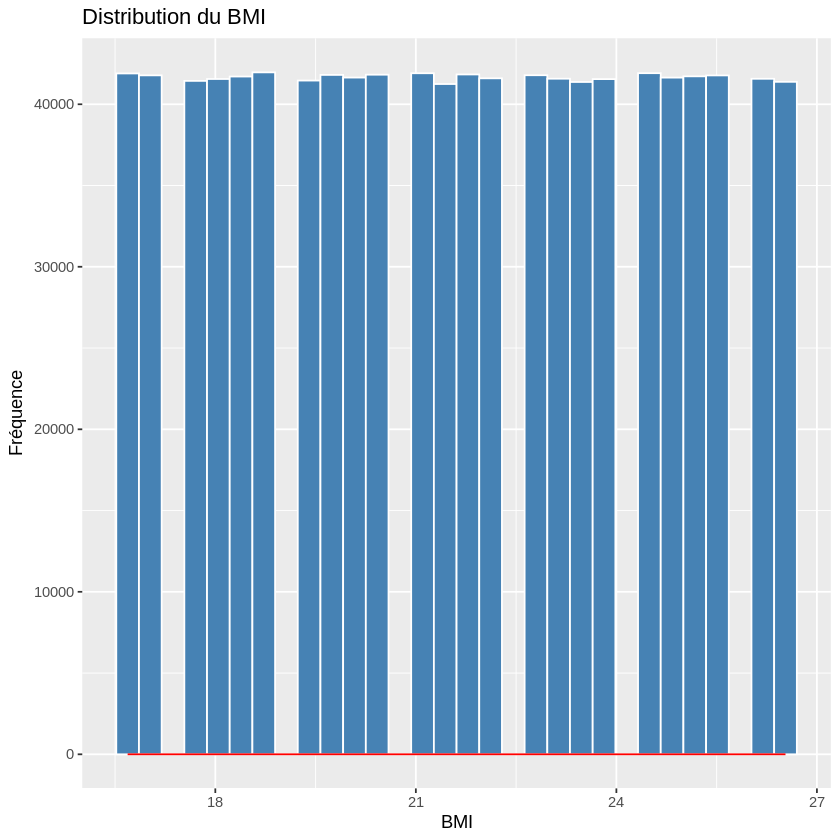

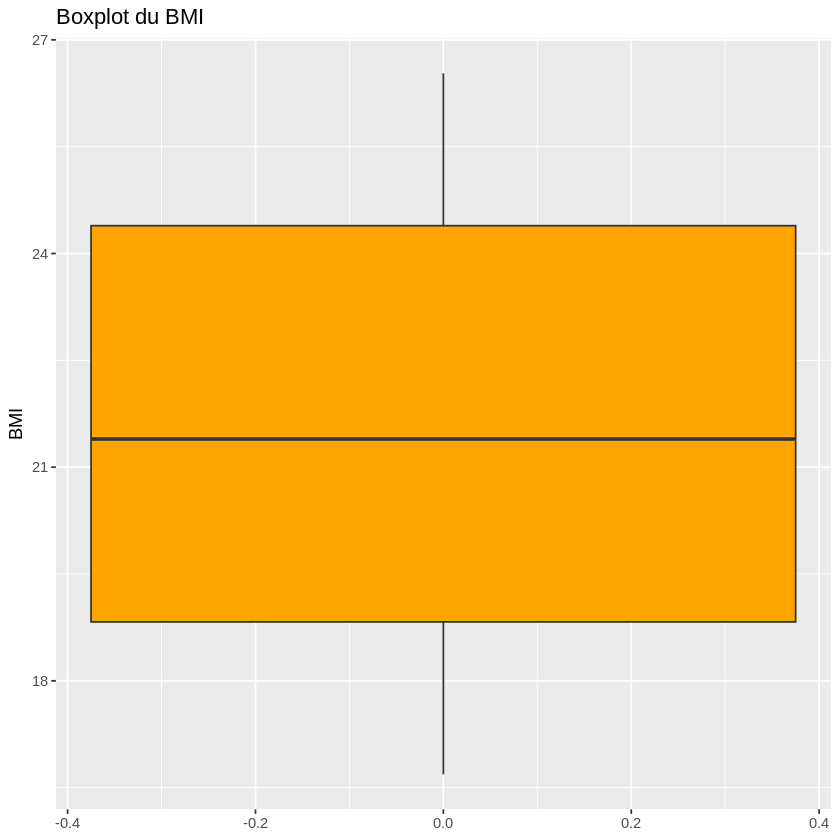

In [ ]:
library(psych)

describe(data[, c("Age", "BMI", "bpm")])

# Histogramme + densité
ggplot(data, aes(x = BMI)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white") +
  geom_density(color = "red") +
  labs(title = "Distribution du BMI", x = "BMI", y = "Fréquence")

# Boxplot simple
ggplot(data, aes(y = BMI)) +
  geom_boxplot(fill = "orange") +
  labs(title = "Boxplot du BMI")

Tests statistiques entre les groupes:
Test t pour comparer l’Age entre les groupes

1.Objectif :
Comparer la moyenne d’Age entre les deux groupes :

No_Miscarriage

Miscarriage

2.Test utilisé :

Welch Two Sample t-test (version du t-test qui ne suppose pas que les variances des deux groupes soient égales).

3.Résultats :

t = -255.04, df ≈ 991884, p-value < 2.2e-16

Intervalle de confiance à 95% pour la différence de moyennes : [-1.86, -1.83]

Moyennes des groupes :

No_Miscarriage : 27,08

Miscarriage : 28,93

4.Interprétation :

La p-value est extrêmement petite (< 0,05), donc on rejette l’hypothèse nulle (les moyennes sont égales).

Il y a donc une différence significative d’âge entre les femmes ayant eu une fausse couche et celles n’en ayant pas eu.

En moyenne, les femmes ayant fait une fausse couche sont plus âgées d’environ 1,85 an.

In [ ]:
# Exemple t-test pour Age
t.test(Age ~ Miscarriage, data = data)




	Welch Two Sample t-test

data:  Age by Miscarriage
t = -255.04, df = 991884, p-value < 2.2e-16
alternative hypothesis: true difference in means between group No_Miscarriage and group Miscarriage is not equal to 0
95 percent confidence interval:
 -1.863667 -1.835241
sample estimates:
mean in group No_Miscarriage    mean in group Miscarriage 
                    27.07925                     28.92870 


Observations :

Age : Les femmes ayant eu une fausse couche sont en moyenne plus âgées que celles n’en ayant pas eu (≈ 1,85 an de différence).

BMI : Très similaire entre les groupes, peu de différence.

bpm : Moyenne très proche entre les deux groupes, forte variabilité dans les deux cas (écart-type ≈ 57).

Conclusion :

L’âge semble être un facteur différenciant entre les groupes.

Le BMI et le bpm ne montrent pas de différences significatives à première vue.

In [ ]:
# Stat descriptives par groupe pour quelques variables
library(dplyr)

data %>%
  group_by(Miscarriage) %>%
  summarise(
    Age_mean = mean(Age),
    Age_sd   = sd(Age),
    BMI_mean = mean(BMI),
    BMI_sd   = sd(BMI),
    bpm_mean = mean(bpm),
    bpm_sd   = sd(bpm)
  )

Miscarriage,Age_mean,Age_sd,BMI_mean,BMI_sd,bpm_mean,bpm_sd
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No_Miscarriage,27.07925,3.789439,21.60042,2.964625,128.9279,57.69639
Miscarriage,28.92870,3.454456,21.61242,2.959030,128.8895,57.73553


# I. EDA Univariée - Variables Catégorielles  

Interprétation :

Les proportions de stress sont très similaires entre les deux groupes.

Les niveaux les plus fréquents sont 0 et 1, tandis que le niveau 2 est peu représenté.

Le niveau 3 est un peu plus présent dans le groupe Miscarriage, mais la différence est faible.

Visualisation – Barplot proportionnel

Le barplot avec position = "fill" montre les proportions relatives de chaque niveau de stress par groupe.

L’axe des y est en pourcentage pour faciliter la comparaison.

La couleur distingue les groupes Miscarriage et No_Miscarriage.

Conclusion :

À première vue, la variable stress ne semble pas fortement différencier les femmes selon qu’elles ont eu une fausse couche ou non.

Pour aller plus loin, on pourrait réaliser un test du Chi² pour vérifier statistiquement l’association entre stress et Miscarriage.

   
    No_Miscarriage Miscarriage
  0     0.34223123  0.34202316
  1     0.34690828  0.34651659
  2     0.08155755  0.08100586
  3     0.22930294  0.23045439

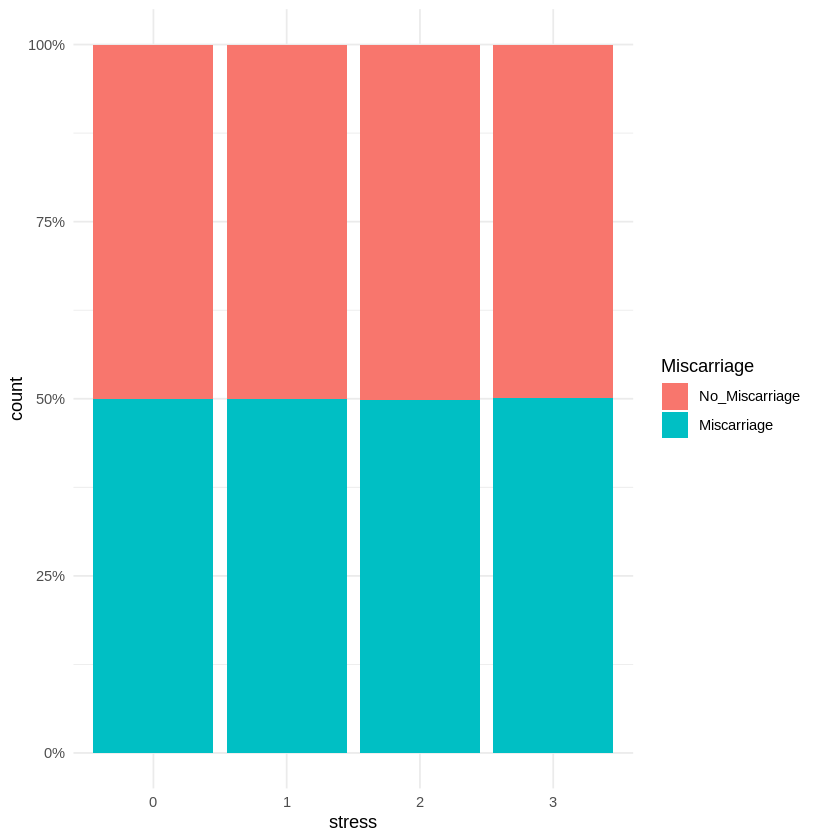

In [ ]:
# Tableau croisé
table_stress <- table(data$stress, data$Miscarriage)
prop.table(table_stress, margin = 2)   # pourcentages par colonne (par groupe)

# Barplot avec ggplot2
ggplot(data, aes(x = stress, fill = Miscarriage)) +
  geom_bar(position = "fill") +  # proportions
  scale_y_continuous(labels = scales::percent) +
  theme_minimal()

Analyse univariée – Activity

La variable Activity indique les types d’activités des individus.

Barplot : permet de visualiser rapidement la répartition des activités.

Observation : une catégorie domine largement (valeur très élevée), ce qui peut indiquer un déséquilibre ou une valeur aberrante.


     1 
999926 


1 
1 

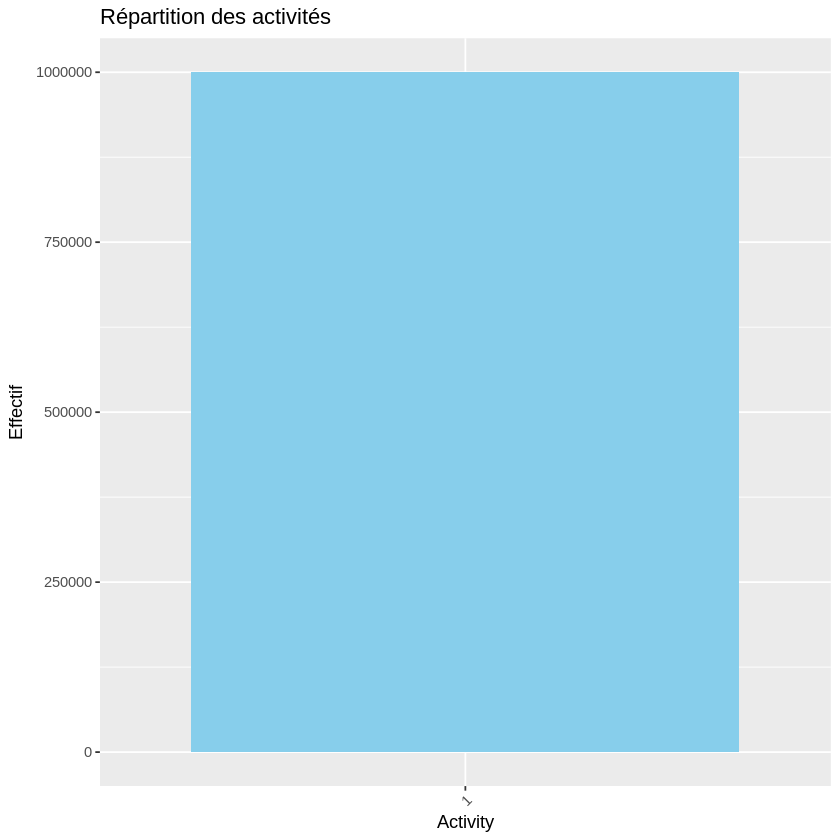

In [ ]:
# Fréquences
table(data$Activity)
prop.table(table(data$Activity))

# Barplot
ggplot(data, aes(x = Activity)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Répartition des activités", x = "Activity", y = "Effectif") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Tests statistiques entre les groupes

#Le test du Chi-deux (variables qualitatives)


Test du Chi² – Variable Drunk vs Miscarriage

Objectif :

Vérifier s’il existe une association entre la consommation d’alcool (Drunk) et la fausse couche (Miscarriage).

Résultats :

Chi² = 0,823, df = 2, p-value = 0,6627

Interprétation :

La p-value est supérieure à 0,05, donc on ne rejette pas l’hypothèse nulle.

Il n’y a donc pas de relation significative entre la consommation d’alcool et la fausse couche dans ce dataset.

In [ ]:
# Exemple chi-deux pour Drunk
tab_drunk <- table(data$Drunk, data$Miscarriage)
chisq.test(tab_drunk)


	Pearson's Chi-squared test

data:  tab_drunk
X-squared = 0.82299, df = 2, p-value = 0.6627


#J. EDA Bivariée - Corrélations


Analyse bivariée – Corrélations (variables numériques)

La corrélation de Pearson mesure la force et la direction de la relation linéaire entre deux variables numériques.

Les valeurs vont de -1 à 1 :

1 → corrélation positive parfaite

-1 → corrélation négative parfaite

0 → pas de corrélation linéaire

Observations principales  :

Age, BMI, Nmisc, temp, Alcohol_Consumption :

Corrélations très proches de zéro entre elles → ces variables ne sont pas linéairement liées.

bpm et bp :

Corrélation ≈ 0,90 → forte relation positive, ce qui est logique (bpm et pression artérielle sont souvent liés).

Toutes les autres corrélations sont très faibles → peu ou pas de relations linéaires fortes entre les autres variables.

Conclusion :

Hormis bpm et bp, les variables numériques sont indépendantes linéairement, ce qui peut simplifier certaines analyses ou modélisations.

In [ ]:
# Sélectionner uniquement les variables numériques
vars_num <- data[, sapply(data, is.numeric)]

# Calculer la matrice de corrélation (Pearson)
mat_corr <- cor(vars_num,
                use = "pairwise.complete.obs",
                method = "pearson")

# Afficher la matrice
mat_corr


,Age,BMI,Nmisc,temp,bpm,bp,Alcohol_Consumption
Age,1.0000000000,1.698580e-03,5.810828e-04,0.0025310139,0.0009427156,0.0006107138,-0.0007903524
BMI,0.0016985797,1.000000e+00,6.433223e-05,0.0008616360,-0.0017999171,-0.0018757136,0.0010189024
Nmisc,0.0005810828,6.433223e-05,1.000000e+00,-0.0017528607,0.0008426885,0.0007589103,0.0011408766
temp,0.0025310139,8.616360e-04,-1.752861e-03,1.0000000000,0.0020420185,0.0014310197,0.0003359857
bpm,0.0009427156,-1.799917e-03,8.426885e-04,0.0020420185,1.0000000000,0.9026499962,-0.0010735500
bp,0.0006107138,-1.875714e-03,7.589103e-04,0.0014310197,0.9026499962,1.0000000000,-0.0002306211
Alcohol_Consumption,-0.0007903524,1.018902e-03,1.140877e-03,0.0003359857,-0.0010735500,-0.0002306211,1.0000000000


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



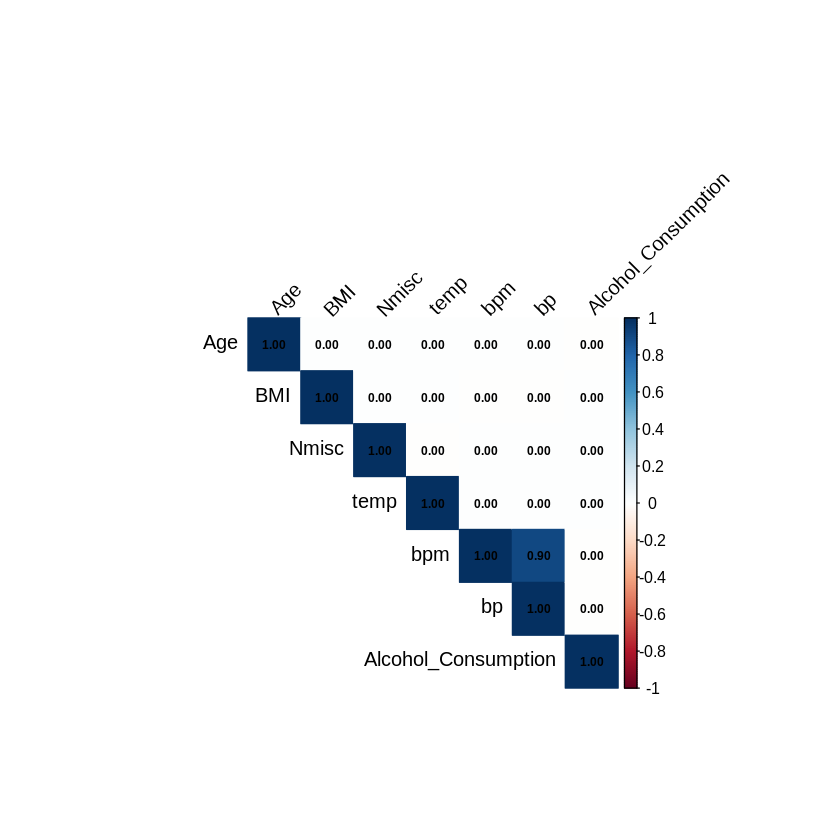

In [ ]:
install.packages("corrplot")

library(corrplot)



corrplot(mat_corr,
         method = "color",
         type = "upper",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 0.6)